In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
cd '/content/gdrive/MyDrive/ComputerVision/CatsAndDog'

/content/gdrive/MyDrive/ComputerVision/CatsAndDog


In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=69cb61138a433e71bd11f588bfd354e3c8ee6c70755a04adf464cfd0526fa154
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
import wget

In [5]:
# link = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
link = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
path_root = '/content/gdrive/MyDrive/ComputerVision/CatsAndDog'
wget.download(link, path_root)


'/content/gdrive/MyDrive/ComputerVision/CatsAndDog/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
local_zip = path_root + '/cats_and_dogs_filtered.zip'
import zipfile
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(path_root)
zip_ref.close()

In [2]:
train_path = './cats_and_dogs_filtered/train'
val_path = './cats_and_dogs_filtered/validation'

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [4]:
train_generator = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.3, horizontal_flip=True)
valid_generator = ImageDataGenerator(rescale=1/255)


In [8]:
train_data = train_generator.flow_from_directory(train_path, target_size=(150, 150), class_mode='binary', batch_size=64)
valid_data = valid_generator.flow_from_directory(train_path, target_size=(150, 150), class_mode='binary', batch_size=64)


Found 1690 images belonging to 2 classes.
Found 1690 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
pwd

'/content/gdrive/MyDrive/ComputerVision/CatsAndDog'

In [9]:
# Xay dung model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 256)       2

In [ ]:
from keras.callbacks import ModelCheckpoint
# Luu lai trong so
check_point_path = './best.h5'
check_point_callback = ModelCheckpoint(check_point_path, monitor = 'val_accuracy',
                                       save_best_only=True, save_weights_only=False,
                                       verbose=1)

In [ ]:
import tensorflow as tf
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras import callbacks
model.fit_generator(train_data, epochs=50, validation_data=valid_data, callbacks=[check_point_callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
27/27 [==============================] - 764s 28s/step - loss: 0.9295 - accuracy: 0.5722 - val_loss: 0.6878 - val_accuracy: 0.5917

Epoch 00001: val_accuracy improved from -inf to 0.59172, saving model to ./best.h5
Epoch 2/50
27/27 [==============================] - 19s 691ms/step - loss: 0.6724 - accuracy: 0.5917 - val_loss: 0.6899 - val_accuracy: 0.5917

Epoch 00002: val_accuracy did not improve from 0.59172
Epoch 3/50
27/27 [==============================] - 17s 619ms/step - loss: 0.6717 - accuracy: 0.5917 - val_loss: 0.6906 - val_accuracy: 0.5917

Epoch 00003: val_accuracy did not improve from 0.59172
Epoch 4/50
27/27 [==============================] - 16s 610ms/step - loss: 0.6547 - accuracy: 0.5917 - val_loss: 0.6788 - val_accuracy: 0.5917

Epoch 00004: val_accuracy did not improve from 0.59172
Epoch 5/50
27/27 [==============================] - 17s 620ms/step - loss: 0.6592 - accuracy: 0.5917 - val_loss: 0.6720 - val_accuracy: 0.5917

Epoch 00005: val_accuracy did not

In [ ]:
model.save('./model.h5')

In [10]:
!pip install tensorflow

In [11]:
import tensorflow as tf
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import os

In [ ]:
import keras
model = keras.models.load_model('./model.h5')

In [13]:
# Model use Transfer learning
link_weights = './inception_v3_weights_nontop.h5'

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_model.load_weights(link_weights)

In [15]:
pre_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
for layer in pre_model.layers:
  layer.trainable = False

In [17]:
last_model_inc = pre_model.get_layer('mixed7')
output = last_model_inc.output
output

<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [18]:
from tensorflow.keras import Model, layers

In [19]:
x = layers.Flatten()(output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_model.input, x)

In [20]:
from tensorflow.keras.optimizers import RMSprop

In [21]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [24]:
batch_size = 64
model.fit_generator(train_data, validation_data=valid_data, epochs=20, verbose=1, steps_per_epoch=train_data.samples//batch_size, validation_steps=valid_data.samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
26/26 [==============================] - 24s 945ms/step - loss: 0.2198 - acc: 0.9084 - val_loss: 0.1193 - val_acc: 0.9549
Epoch 2/20
26/26 [==============================] - 24s 925ms/step - loss: 0.1667 - acc: 0.9342 - val_loss: 0.0736 - val_acc: 0.9718
Epoch 3/20
26/26 [==============================] - 24s 924ms/step - loss: 0.1746 - acc: 0.9200 - val_loss: 0.0826 - val_acc: 0.9645
Epoch 4/20
26/26 [==============================] - 24s 934ms/step - loss: 0.1750 - acc: 0.9330 - val_loss: 0.0876 - val_acc: 0.9675
Epoch 5/20
26/26 [==============================] - 24s 915ms/step - loss: 0.1473 - acc: 0.9403 - val_loss: 0.1159 - val_acc: 0.9585
Epoch 6/20
26/26 [==============================] - 23s 912ms/step - loss: 0.1507 - acc: 0.9446 - val_loss: 0.0696 - val_acc: 0.9712
Epoch 7/20
26/26 [==============================] - 23s 908ms/step - loss: 0.1694 - acc: 0.9379 - val_loss: 0.0633 - val_acc: 0.9784
Epoch 8/20
26/26 [==============================] - 24s 917ms/step - 

In [26]:
model.save('./model1.h5')

In [27]:
import keras
model = keras.models.load_model('./model1.h5')

Saving cho.jpg to cho (2).jpg
Dog and accuracy: 1.0


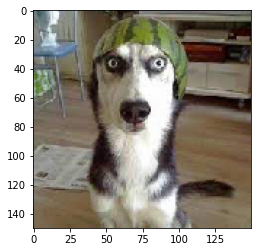

In [32]:
uploaded = files.upload()
for file in uploaded.keys():
  path = './' + file
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  img = image.img_to_array(img).astype('float') * 1/255.0

  img = img.reshape(-1, 150, 150, 3)

  y_pre = model.predict(img)
  res = y_pre[0][0]
  if res >= 0.5:
    print('Dog' + ' and accuracy: ' + str(res))
  else:
    print('Cat' + ' and accuracy: ' + str(res))